# Project: No-show appointments - [KaggleV2-May-2016]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://www.kaggle.com/joniarroba/noshowappointments). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 

#### Data Dictionary

01 - PatientId:Identification of a patient

02 - AppointmentID:Identification of each appointment

03 - Gender:Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.

04 - DataMarcacaoConsulta:The day of the actuall appointment, when they have to visit the doctor.

05 - DataAgendamento:The day someone called or registered the appointment, this is before appointment of course.

06 - Age:How old is the patient.
   
07 - Neighbourhood:Where the appointment takes place.

08 - Scholarship:True of False . Observation, this is a broad topic, consider reading this article 
https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia

09 - Hipertension:True or False

10 - Diabetes:True or False

Alcoholism:True or False

Handcap:True or False

SMS_received:1 or more messages sent to the patient.

No-show:True or False.

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


Data Wrangling which include :
    1.Gathering Data
    2.Assessing Data
    3.cleaning Data

### Gathering Data

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('KaggleV2-May-2016.csv')


we aqucistion data from dataset like : csv file in our example

In [4]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Noshow
0,2.990000e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.590000e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.260000e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.680000e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.840000e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


we use head() or tail() function to display a sample of data 

In [5]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Noshow
110522,2.570000e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.600000e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.560000e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.210000e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.780000e+14,5629448,F,2016-04-27 13:30:56+00:00,2016-06-07 00:00:00+00:00,54,MARIA ORTIZ,0,0,0,0,0,1,No


### Assessing Data 

We assessing our data using some function like : shape , ndim , dtypes , size  , info() , nunique() , isnull()

In [6]:
# return number of columns and number of row
df.shape

(110527, 14)

the shape function get number of rows and number of columns in tuple

In [7]:
#return number of dimensions of data
df.ndim

2

In [8]:
#return types of each column
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
Noshow             object
dtype: object

dtypes show us data type of each column (features)

In [9]:
# return size of Dataset which is a multiplication of number of rows and number of columns
df.size

1547378

size function show us the result of multiplication of number of rows and number of columns

In [10]:
#return number of non-null-value and datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
Noshow            110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


info() function show us number of non_null_value in each column and datatype

it has two features(no of non_null_value,datatype)

In [11]:
#return number of unique value
df.nunique()

PatientId           6100
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
Noshow                 2
dtype: int64

nunique() show us number of unique values in each column

In [12]:
# return which value is nul or not for each element in DataSet 
df.isnull()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Noshow
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False


isnull() function show us boolean value for each element (each cell) it is null or not

if it(element) null return True

else  return False

In [13]:
# return which value is nul or not for each columns in DataSet 
df.isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
Noshow            False
dtype: bool

isnull().any() function show us boolean value for each column it is null or not

if column null return True

else  return False

In [14]:
#return number of columns has a null value
df.isnull().any().sum()

0

In [15]:
#return number of null value for each column
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
Noshow            0
dtype: int64

isnull().any() function show us boolean value for each column it is null or not

if column null return 1

else  return 0

In [16]:
#return a number of cell has a null value
df.isnull().sum().sum()

0

In [17]:
#return statistical descriptive of dataset for each column
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474961e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560943e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.170000e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.170000e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.440000e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000e+15,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


describe() function show us descriptive statistical value for each column

in 8 value such as: count element in each column
    
                    mean : getting average in each column
                    
                    std : standarded deviation
                        
                    min : minimum value in each column
                        
                    max : maximum value in each column
                        
                    50% : median of value for each column


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

1.duplicated data

2.missing value

3.incorrect datatype

from assessing no NULL value

we will check for missing value and incorrect datatype

In [18]:
df.drop(['PatientId','AppointmentID'],axis=1,inplace = True)

In [19]:
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Noshow
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [20]:
df.dtypes

Gender            object
ScheduledDay      object
AppointmentDay    object
Age                int64
Neighbourhood     object
Scholarship        int64
Hipertension       int64
Diabetes           int64
Alcoholism         int64
Handcap            int64
SMS_received       int64
Noshow            object
dtype: object

After discussing the structure of the data and any problems that need to be

cleaned, perform those cleaning steps in the second part of this section.

#### duplicicated data

In [21]:
#check for duplicated data
sum(df.duplicated())

635

In [22]:
# if we have duplicated data we remove it
df.drop_duplicates(inplace = True)

In [23]:
sum(df.duplicated())

0

##### incorrect datatype

In [24]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

In [25]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

### checking

In [26]:
df.dtypes

Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
Noshow                         object
dtype: object

In [27]:
df.Noshow.count()

109892

In [28]:
df.Noshow.value_counts()

No     87794
Yes    22098
Name: Noshow, dtype: int64

In [29]:
df.Neighbourhood.value_counts()

JARDIM CAMBURI                 7616
MARIA ORTIZ                    5804
RESISTÊNCIA                    4387
JARDIM DA PENHA                3873
ITARARÉ                        3470
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

In [30]:
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Noshow
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No


#### DONE
#### non_dublicated data....non_missing value....non incorrect datatype

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment? Exploraty Data Analysis 

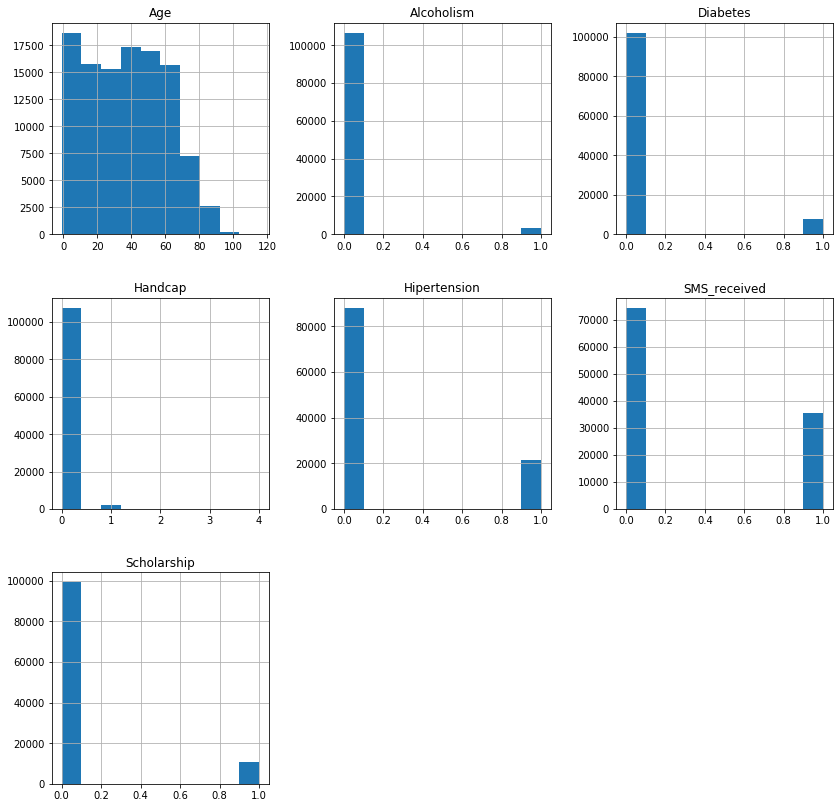

In [31]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.hist(figsize = (14,14));

using hist() function to draw Histogram for each column 

and use figsize(,) parameter to show it obviously

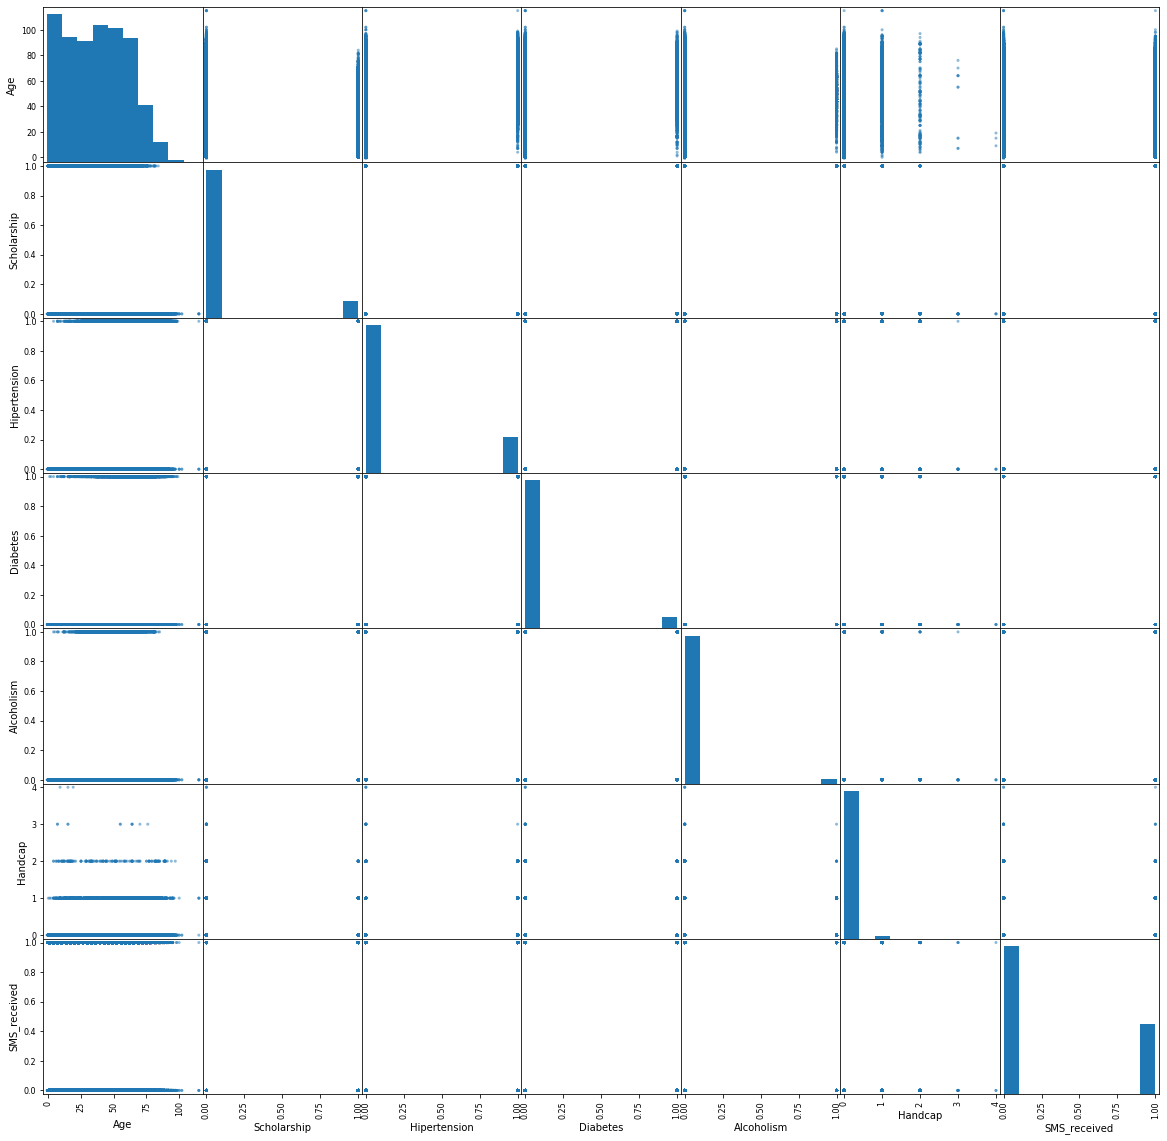

In [32]:
pd.plotting.scatter_matrix(df, figsize = (20,20));

using plotting.scatter_matrix() function to draw Histogramsfor each column 

and scatter plotting between numerical columns 

and use figsize(,) parameter to show it obviously

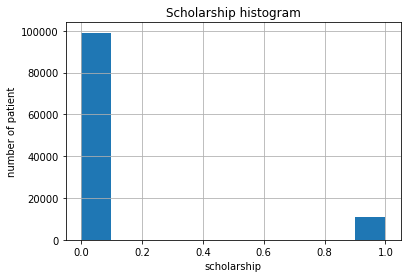

In [33]:
df.Scholarship.hist();
plt.ylabel('number of patient')
plt.xlabel('scholarship')
plt.title('Scholarship histogram');

Histogram for scholarship of patients

In [34]:
df.Scholarship.count()

109892

count() function to get number of element in column scholarship

In [35]:
df.Scholarship.sum()

10801

sum() function to get summation of element in column scholarship

In [36]:
df.Scholarship.describe()

count    109892.000000
mean          0.098287
std           0.297704
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Scholarship, dtype: float64

describe() function to get descriptive statistical of element in column scholarship

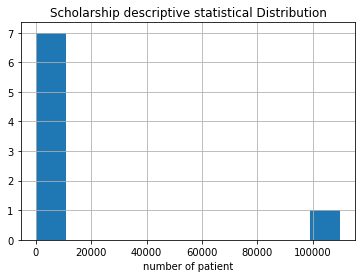

In [37]:
df.Scholarship.describe().hist();
plt.xlabel('number of patient')
plt.title('Scholarship descriptive statistical Distribution');

Histogram for describe() function to get descriptive statistical of element in column scholarship

In [38]:
df.Scholarship.value_counts()

0    99091
1    10801
Name: Scholarship, dtype: int64

value_counts() function to get number repeation of each element in column scholarship

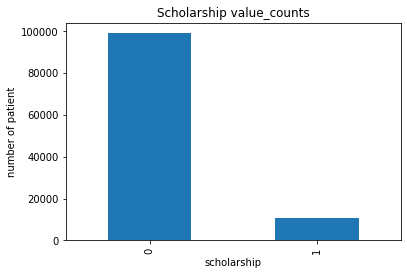

In [39]:
df.Scholarship.value_counts().plot(kind='bar');
plt.ylabel('number of patient')
plt.xlabel('scholarship')
plt.title('Scholarship value_counts');

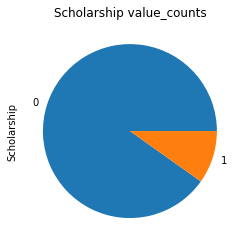

In [40]:
df.Scholarship.value_counts().plot(kind='pie');

plt.title('Scholarship value_counts');

Histogram for Age of patients

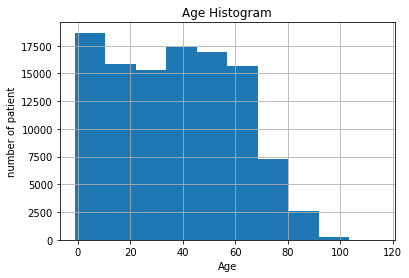

In [41]:
df.Age.hist();
plt.ylabel('number of patient')
plt.xlabel('Age')
plt.title('Age Histogram');

In [42]:
df.Age.count()

109892

count() function to get number of element in column Age

In [43]:
df.Age.describe()

count    109892.000000
mean         37.089506
std          23.121196
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

describe() function to get descriptive statistical of element in column Age

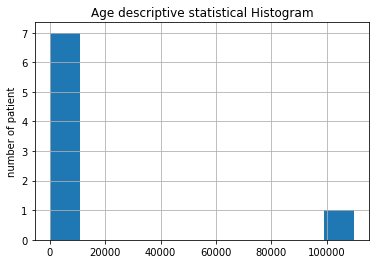

In [44]:
df.Age.describe().hist();
plt.ylabel('number of patient')
plt.title('Age descriptive statistical Histogram');

Histogram for describe() function to get descriptive statistical of element in column Age

In [45]:
df.Age.value_counts()

 0      3530
 1      2271
 52     1738
 49     1645
 53     1641
        ... 
 115       4
 100       3
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

value_counts() function to get number repeation of each element in column Age

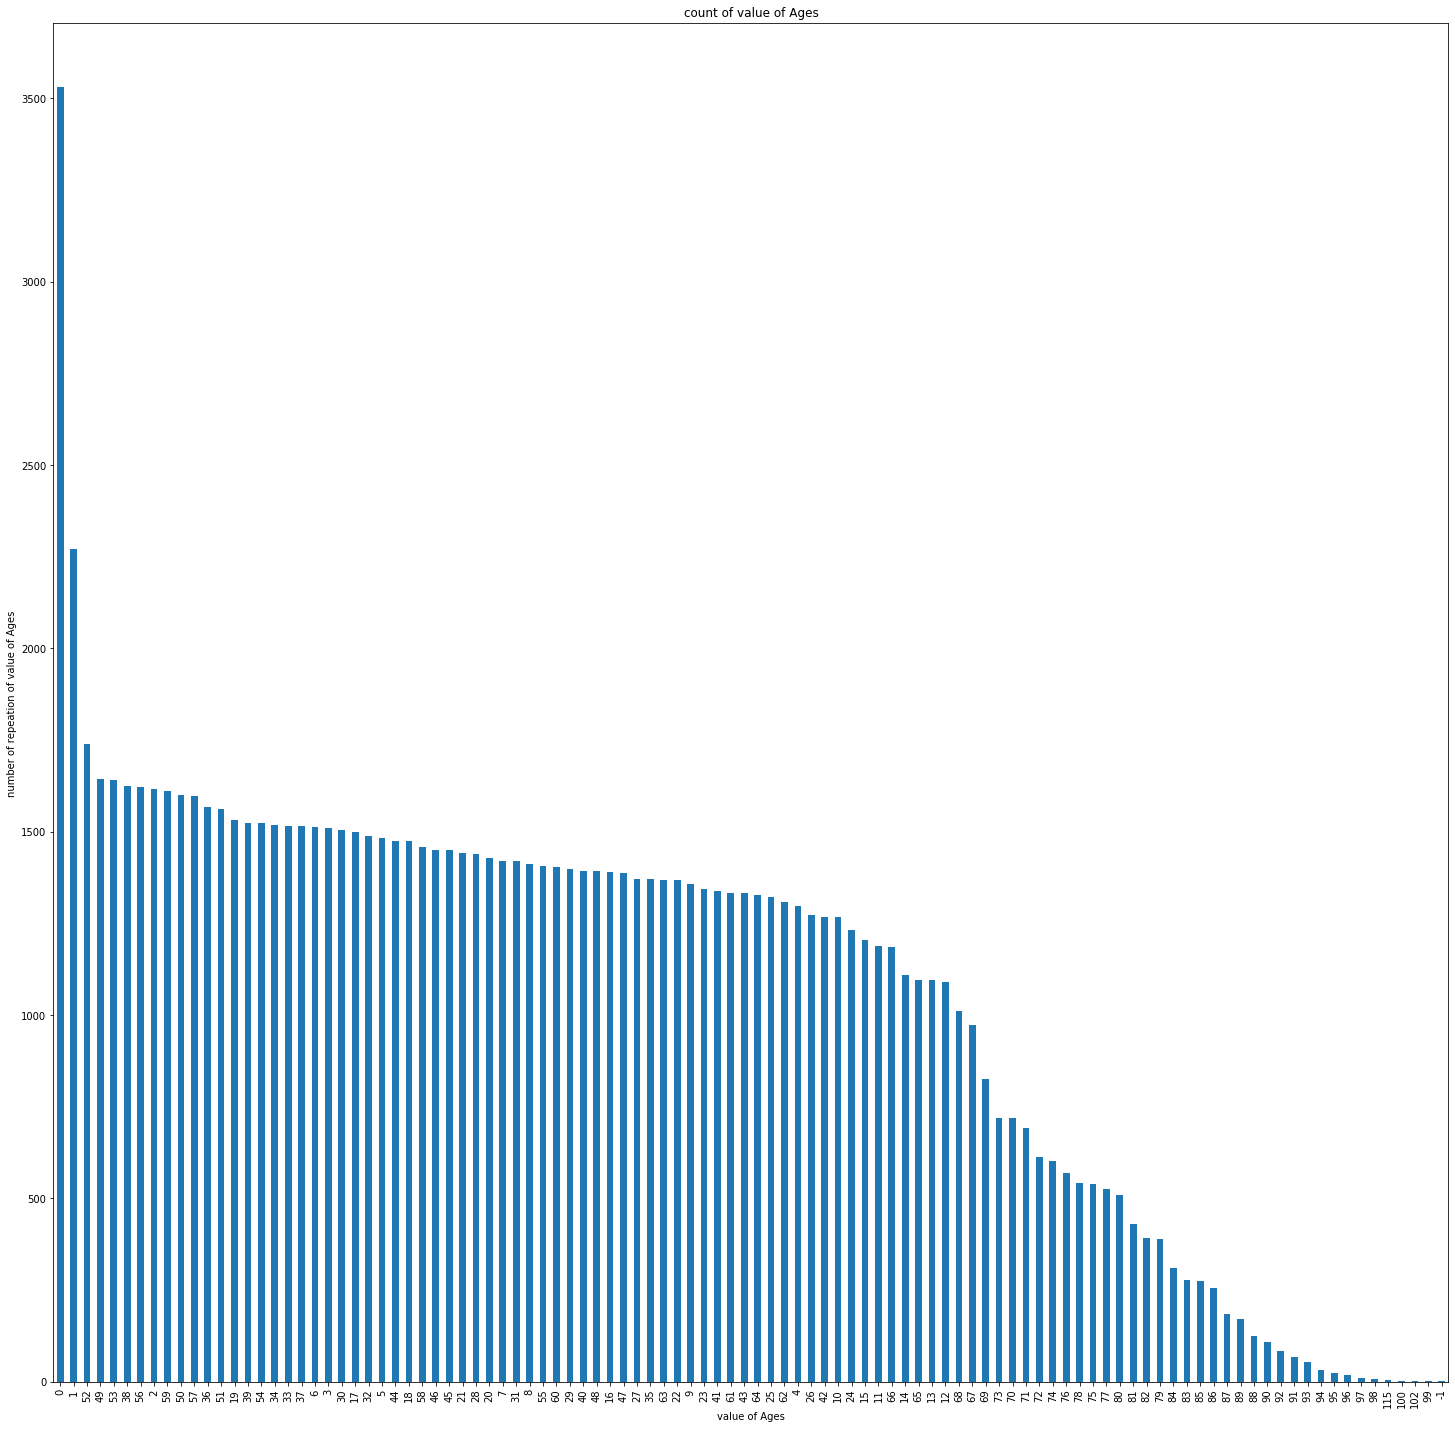

In [46]:
df.Age.value_counts().plot(kind='bar',figsize=(25,25));
plt.ylabel('number of repeation of value of Ages ')
plt.xlabel('value of Ages')
plt.title('count of value of Ages');

In [47]:
df.Age.sum() 

4075840

sum() function to get summation of element in column scholarship

In [48]:
df.Age.mean()

37.08950606049576

mean() function to get average of element in column Age

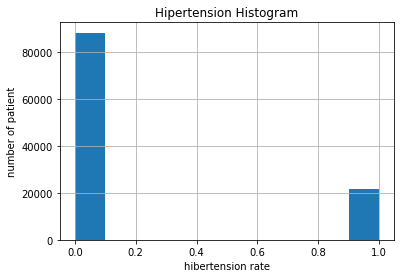

In [49]:
df.Hipertension.hist();
plt.ylabel('number of patient')
plt.xlabel('hibertension rate')
plt.title('Hipertension Histogram');

Histogram for hipertension of patients

In [50]:
df.Hipertension.count()

109892

count() function to get number of element in column hipertension

In [51]:
df.Hipertension.describe()

count    109892.000000
mean          0.197248
std           0.397923
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Hipertension, dtype: float64

describe() function to get descriptive statistical of element in column hipertension

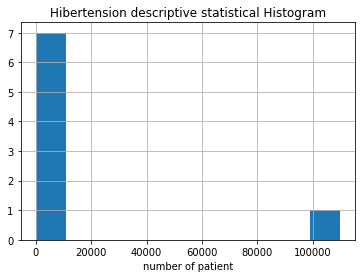

In [52]:
df.Hipertension.describe().hist();
plt.xlabel('number of patient')
plt.title('Hibertension descriptive statistical Histogram');

describe() function to get descriptive statistical of element in column hipertension

In [53]:
df.Hipertension.value_counts()

0    88216
1    21676
Name: Hipertension, dtype: int64

value_counts() function to get number repeation of each element in column hipertension

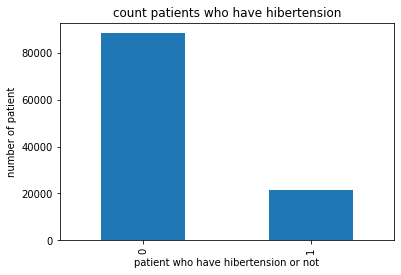

In [54]:
df.Hipertension.value_counts().plot(kind='bar');
plt.ylabel('number of patient')
plt.xlabel('patient who have hibertension or not')
plt.title('count patients who have hibertension');

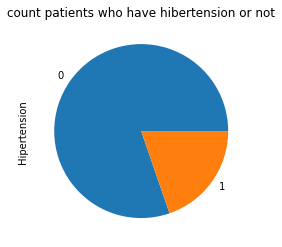

In [55]:
df.Hipertension.value_counts().plot(kind='pie');
plt.title('count patients who have hibertension or not');

In [56]:
df.Hipertension.sum() 

21676

sum() function to get summation of element in column hipertension

In [57]:
df.Hipertension.mean()

0.1972482073308339

mean() function to get average of element in column hipertension

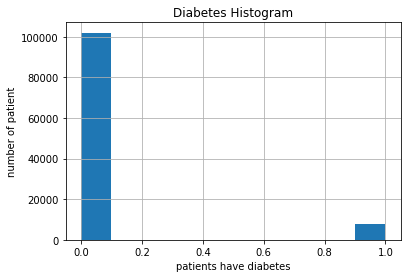

In [58]:
df.Diabetes.hist();
plt.ylabel('number of patient')
plt.xlabel('patients have diabetes')
plt.title('Diabetes Histogram');

Histogram for diabetes of patients

In [59]:
df.Diabetes.count()

109892

count() function to get number of element in column Diabetes

In [60]:
df.Diabetes.value_counts()

0    101999
1      7893
Name: Diabetes, dtype: int64

value_counts() function to get number repeation of each element in column Diabetes

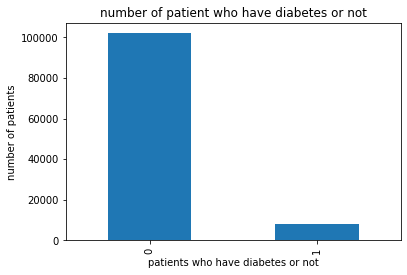

In [61]:
df.Diabetes.value_counts().plot(kind='bar');
plt.ylabel('number of patients')
plt.xlabel('patients who have diabetes or not')
plt.title('number of patient who have diabetes or not');

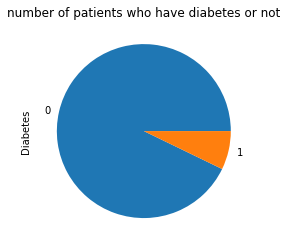

In [62]:
df.Diabetes.value_counts().plot(kind='pie');
plt.title('number of patients who have diabetes or not');

In [63]:
df.Diabetes.sum() 

7893

sum() function to get summation of element in column Diabetes

In [64]:
df.Diabetes.mean()

0.07182506460888873

mean() function to get average of element in column Diabetes

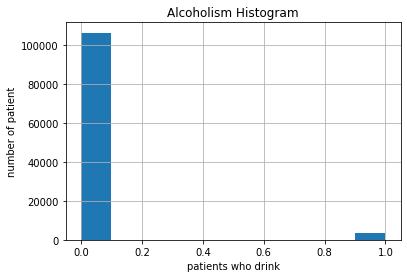

In [65]:
df.Alcoholism.hist();
plt.ylabel('number of patient')
plt.xlabel('patients who drink')
plt.title('Alcoholism Histogram');

Histogram for Alcoholism of patients

In [66]:
df.Alcoholism.count()

109892

count() function to get number of element in column Alcoholism

In [67]:
df.Alcoholism.value_counts()

0    106548
1      3344
Name: Alcoholism, dtype: int64

value_counts() function to get number repeation of each element in column Alcoholism

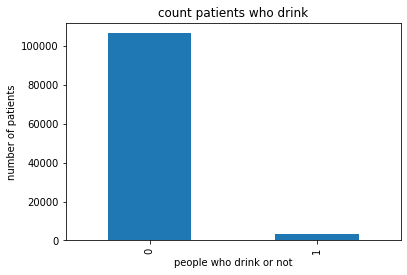

In [68]:
df.Alcoholism.value_counts().plot(kind='bar');
plt.ylabel('number of patients')
plt.xlabel('people who drink or not')
plt.title('count patients who drink');

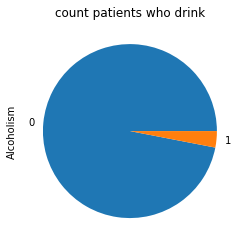

In [69]:
df.Alcoholism.value_counts().plot(kind='pie');
plt.title('count patients who drink');

In [70]:
df.Alcoholism.sum() 

3344

sum() function to get summation of element in column Alcohloism

In [71]:
df.Alcoholism.mean()

0.030429876606122376

mean() function to get average of element in column Alcoholism

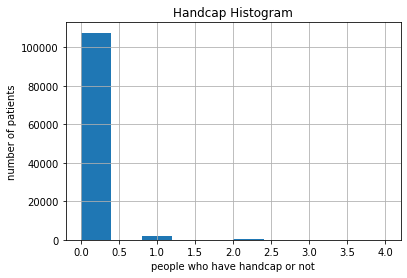

In [72]:
df.Handcap.hist();
plt.ylabel('number of patients')
plt.xlabel('people who have handcap or not')
plt.title('Handcap Histogram');

Histogram for Handcap of patients

In [73]:
df.Handcap.count()

109892

count() function to get number of element in column Handcap

In [74]:
df.Handcap.value_counts()

0    107673
1      2023
2       182
3        11
4         3
Name: Handcap, dtype: int64

value_counts() function to get number repeation of each element in column Handcap

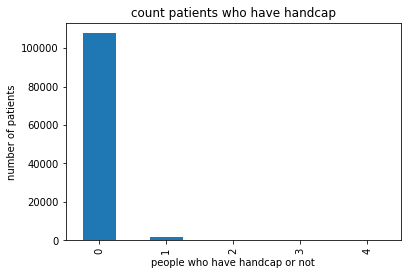

In [75]:
df.Handcap.value_counts().plot(kind='bar');
plt.ylabel('number of patients')
plt.xlabel('people who have handcap or not')
plt.title('count patients who have handcap');

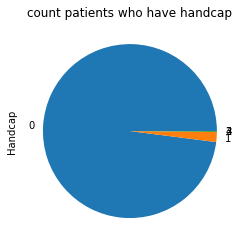

In [76]:
df.Handcap.value_counts().plot(kind='pie');
plt.title('count patients who have handcap');

In [77]:
df.Handcap.sum() 

2432

sum() function to get summation of element in column Handcap

In [78]:
df.Handcap.mean()

0.022130819349907183

mean() function to get average of element in column Handcap

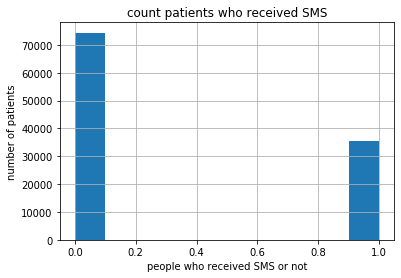

In [79]:
df.SMS_received.hist();
plt.ylabel('number of patients')
plt.xlabel('people who received SMS or not')
plt.title('count patients who received SMS');

Histogram for SMS_received to patients

In [80]:
df.SMS_received.count()

109892

count() function to get number of element in column SMS_received

In [81]:
df.SMS_received.value_counts()

0    74410
1    35482
Name: SMS_received, dtype: int64

value_counts() function to get number repeation of each element in column SMS_received

In [82]:
df.SMS_received.sum() 

35482

sum() function to get summation of element in column SMS_recieved

In [83]:
df.SMS_received.mean()

0.322880646452881

mean() function to get average of element in column SMS_recevied

In [84]:
df.groupby(['Noshow'])['Hipertension','Alcoholism','Handcap','Diabetes','Scholarship'].mean()

,Hipertension,Alcoholism,Handcap,Diabetes,Scholarship
Noshow,,,,,
No,0.204433,0.030480,0.022633,0.073707,0.093913
Yes,0.168703,0.030229,0.020138,0.064350,0.115667


average people who come or not with any diesase like : ['Hipertension','Alcoholism','Handcap','Diabetes','Scholarship']

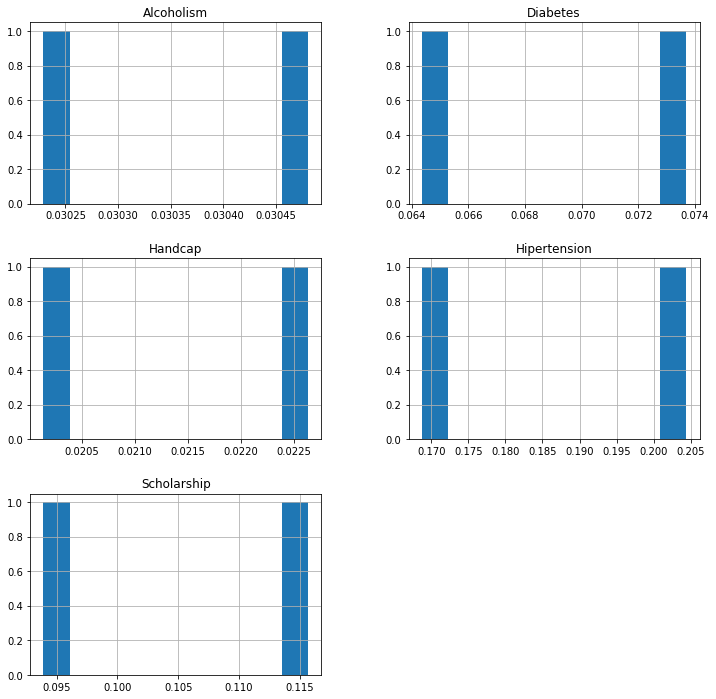

In [85]:
df.groupby(['Noshow'])['Hipertension','Alcoholism','Handcap','Diabetes','Scholarship'].mean().hist(figsize=(12,12));

Histgram of average people who come or not with any diesase like : ['Hipertension','Alcoholism','Handcap','Diabetes','Scholarship']

In [86]:
df.groupby(['Noshow'])['Hipertension','Alcoholism','Handcap','Diabetes','Scholarship'].count()

,Hipertension,Alcoholism,Handcap,Diabetes,Scholarship
Noshow,,,,,
No,87794,87794,87794,87794,87794
Yes,22098,22098,22098,22098,22098


number of people who come or not with any diesase like : ['Hipertension','Alcoholism','Handcap','Diabetes','Scholarship']


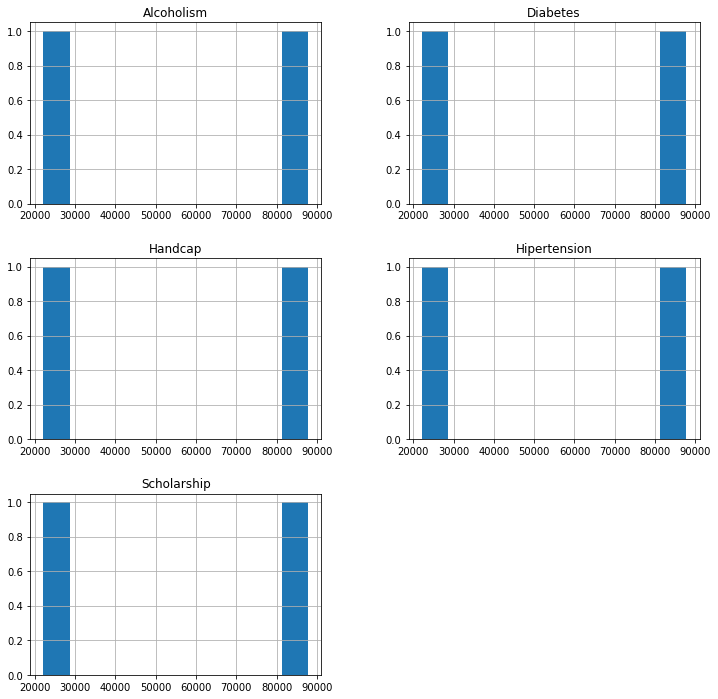

In [87]:
df.groupby(['Noshow'])['Hipertension','Alcoholism','Handcap','Diabetes','Scholarship'].count().hist(figsize=(12,12));

Histgram of number of people who come or not with any diesase like : ['Hipertension','Alcoholism','Handcap','Diabetes','Scholarship']

In [88]:
df.groupby(['Noshow'])['Hipertension','Alcoholism','Handcap','Diabetes','Scholarship'].sum()

,Hipertension,Alcoholism,Handcap,Diabetes,Scholarship
Noshow,,,,,
No,17948,2676,1987,6471,8245
Yes,3728,668,445,1422,2556


summation of number of people who come or not with any diesase like : ['Hipertension','Alcoholism','Handcap','Diabetes','Scholarship']


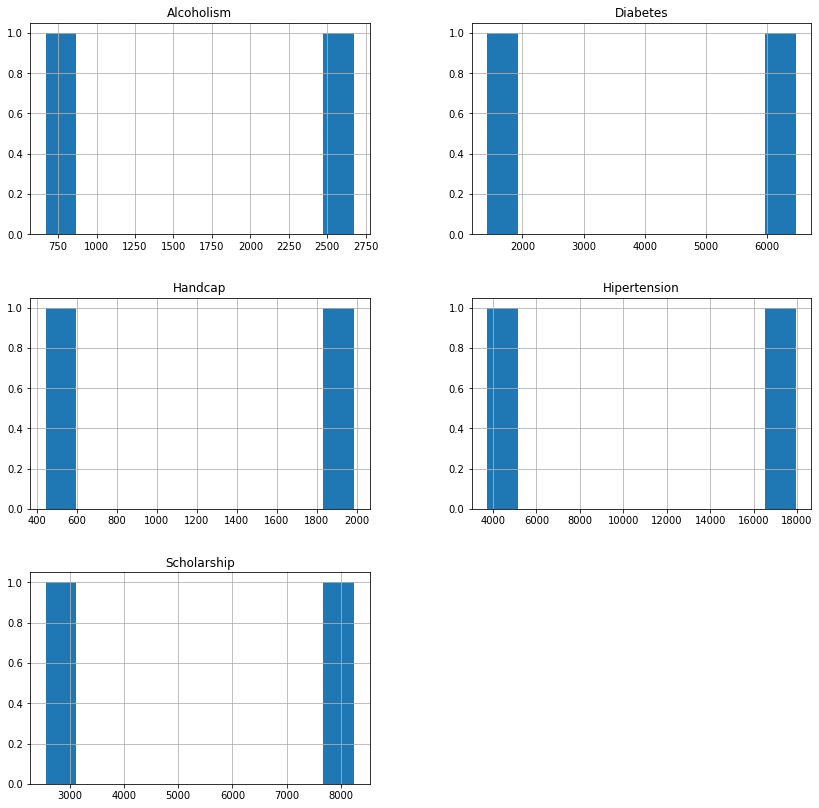

In [89]:
df.groupby(['Noshow'])['Hipertension','Alcoholism','Handcap','Diabetes','Scholarship'].sum().hist(figsize=(14,14));

Histgram of summation of number of people who come or not with any diesase like : ['Hipertension','Alcoholism','Handcap','Diabetes','Scholarship']

In [90]:
df.groupby(['Scholarship'])['Hipertension','Alcoholism','Handcap','Diabetes'].mean()

,Hipertension,Alcoholism,Handcap,Diabetes
Scholarship,,,,
0,0.199837,0.028479,0.022605,0.073942
1,0.173502,0.048329,0.017776,0.052403


average people who have scholarship or not with any diesase like : ['Hipertension','Alcoholism','Handcap','Diabetes','Scholarship']

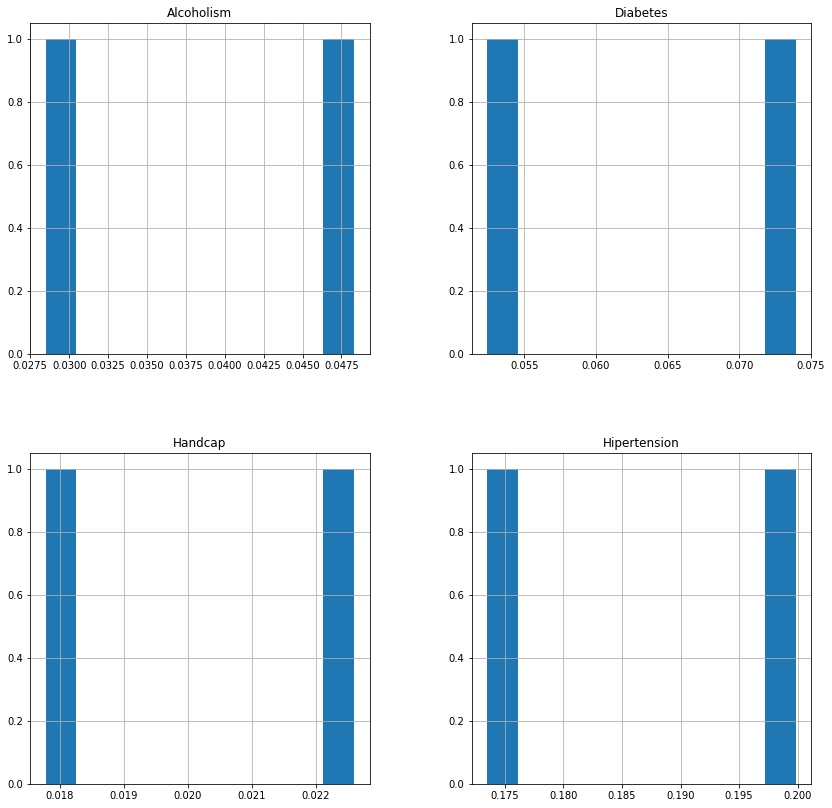

In [91]:
df.groupby(['Scholarship'])['Hipertension','Alcoholism','Handcap','Diabetes'].mean().hist(figsize=(14,14));

Histgram of average people who have scholarship or not with any diesase like : ['Hipertension','Alcoholism','Handcap','Diabetes','Scholarship']

In [92]:
df.groupby(['Scholarship'])['Hipertension','Alcoholism','Handcap','Diabetes'].sum()

,Hipertension,Alcoholism,Handcap,Diabetes
Scholarship,,,,
0,19802,2822,2240,7327
1,1874,522,192,566


summation people who have scholarship or not with any diesase like : ['Hipertension','Alcoholism','Handcap','Diabetes','Scholarship']


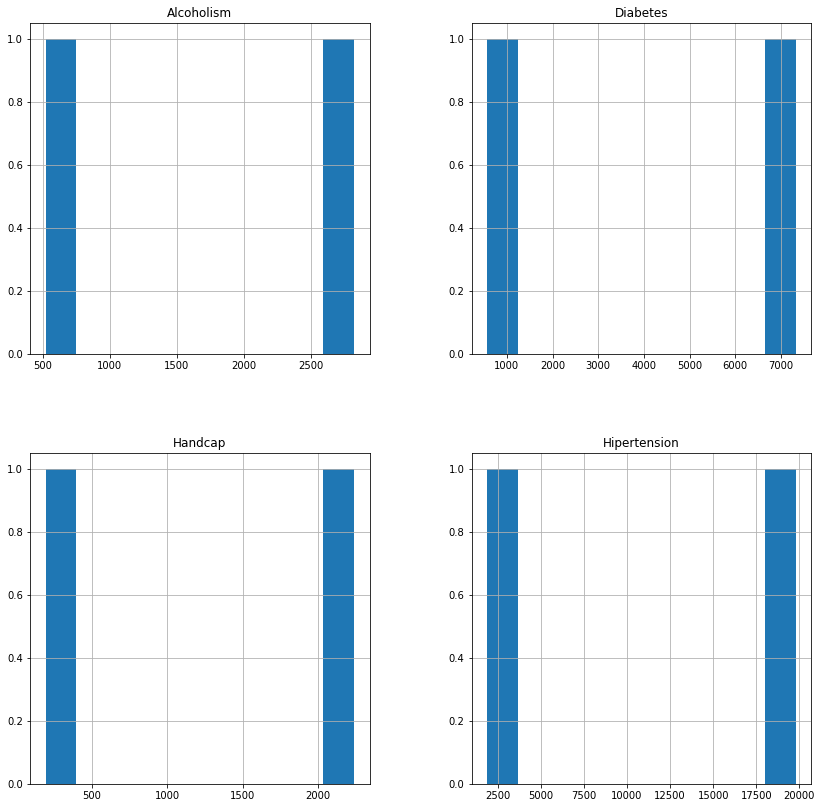

In [93]:
df.groupby(['Scholarship'])['Hipertension','Alcoholism','Handcap','Diabetes'].sum().hist(figsize=(14,14));

Histgram of summation of people who have scholarship or not with any diesase like : ['Hipertension','Alcoholism','Handcap','Diabetes','Scholarship']

In [94]:
df.groupby(['Scholarship'])['Hipertension','Alcoholism','Handcap','Diabetes'].count()

,Hipertension,Alcoholism,Handcap,Diabetes
Scholarship,,,,
0,99091,99091,99091,99091
1,10801,10801,10801,10801


number of people who have scholarship or not with any diesase like : ['Hipertension','Alcoholism','Handcap','Diabetes','Scholarship']

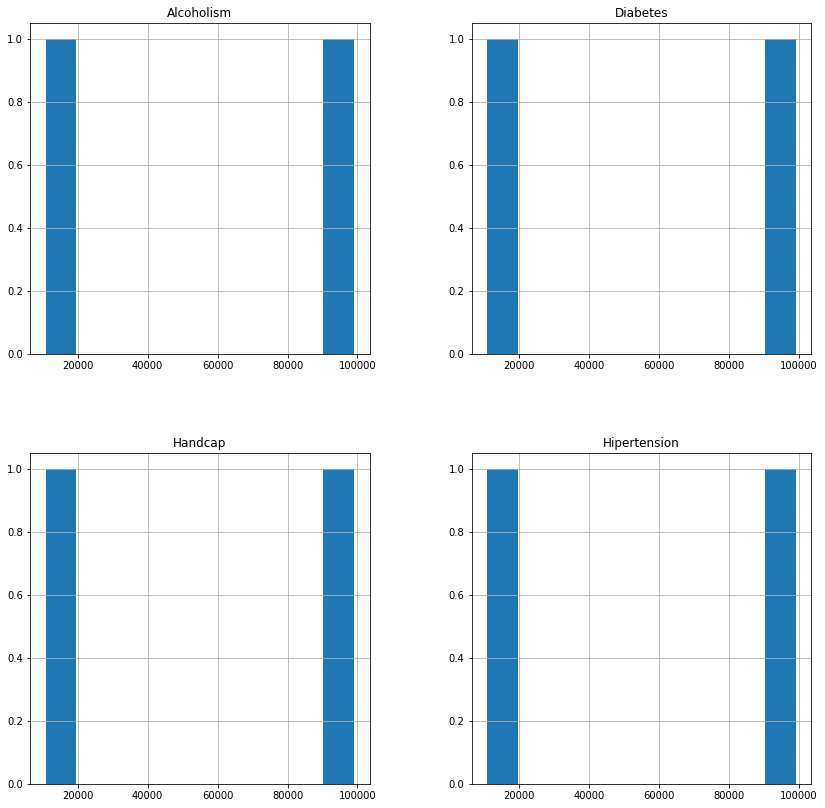

In [95]:
df.groupby(['Scholarship'])['Hipertension','Alcoholism','Handcap','Diabetes'].count().hist(figsize=(14,14));

Histgram of number of people who have scholarship or not with any diesase like : ['Hipertension','Alcoholism','Handcap','Diabetes','Scholarship']

In [96]:
df.groupby(['Diabetes'])['Hipertension'].mean()

Diabetes
0    0.149325
1    0.816546
Name: Hipertension, dtype: float64

average people who have Hipertension and Diabetes

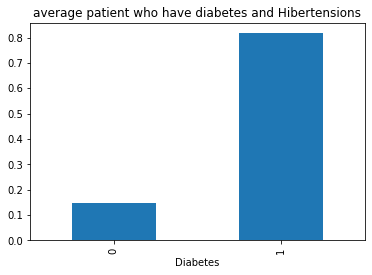

In [97]:
df.groupby(['Diabetes'])['Hipertension'].mean().plot(kind = 'bar',title='average patient who have diabetes and Hibertensions');

Histgram of average people who have Hipertension and Diabetes

In [98]:
df.groupby(['Alcoholism'])['Handcap'].mean()

Alcoholism
0    0.022046
1    0.024821
Name: Handcap, dtype: float64

average people who have Alcoholism and Handcap

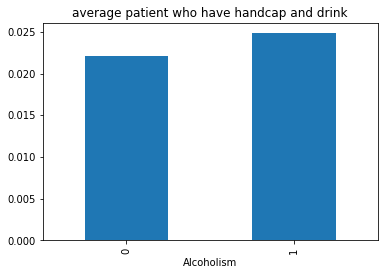

In [99]:
df.groupby(['Alcoholism'])['Handcap'].mean().plot(kind = 'bar' , title ='average patient who have handcap and drink');

Histgram of average people who have Alcoholism and Handcap

In [100]:
df.groupby(['SMS_received'])['Scholarship'].mean()

SMS_received
0    0.098051
1    0.098782
Name: Scholarship, dtype: float64

average people who have Scholarship and SMS_received

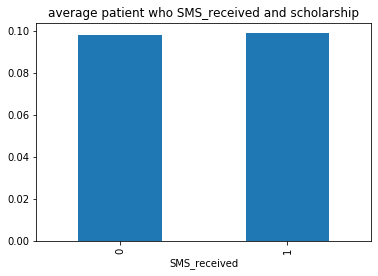

In [101]:
df.groupby(['SMS_received'])['Scholarship'].mean().plot(kind = 'bar',title = 'average patient who SMS_received and scholarship');

Histgram of average people who have Scholarship and SMS_received

In [102]:
df.Neighbourhood.value_counts()

JARDIM CAMBURI                 7616
MARIA ORTIZ                    5804
RESISTÊNCIA                    4387
JARDIM DA PENHA                3873
ITARARÉ                        3470
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

number of (value) neighbourhood hosbital that repeated in column

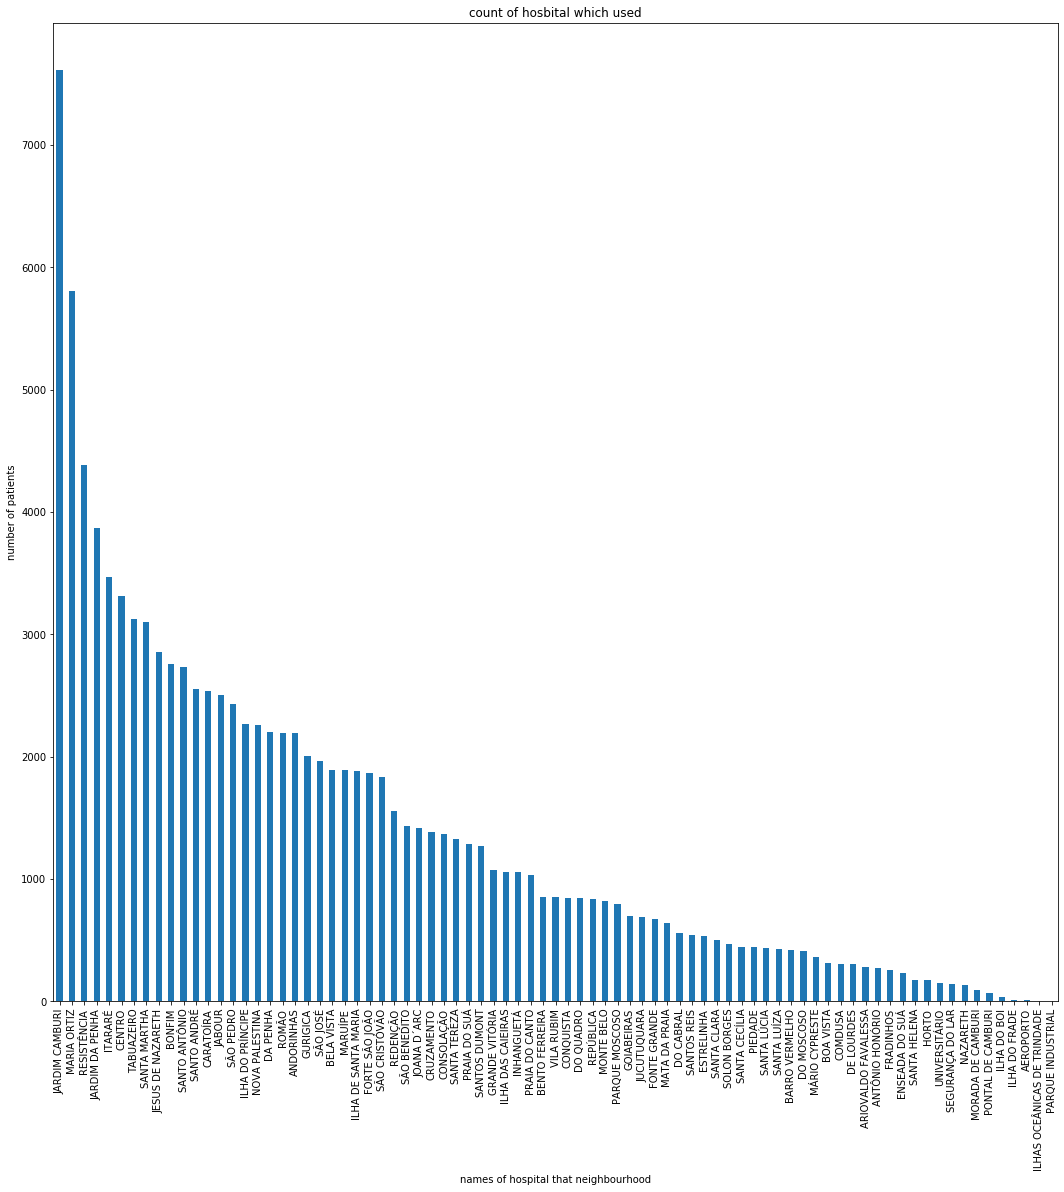

In [103]:
df.Neighbourhood.value_counts().plot(kind='bar',figsize=(18,18));
plt.ylabel('number of patients')
plt.xlabel('names of hospital that neighbourhood')
plt.title('count of hosbital which used');

draw a bar diagram for number of (value) neighbourhood hosbital that repeated in column

In [104]:
df.Neighbourhood.count()

109892

number of neighbourhood hosbital in dataset

In [105]:
df.Neighbourhood.describe()

count             109892
unique                81
top       JARDIM CAMBURI
freq                7616
Name: Neighbourhood, dtype: object

descriptive statistical for neighbourhood column

In [106]:
df.ScheduledDay.value_counts()

2016-05-06 07:09:54+00:00    23
2016-05-06 07:09:53+00:00    23
2016-04-25 17:17:46+00:00    22
2016-04-25 17:18:27+00:00    22
2016-04-25 17:17:23+00:00    19
                             ..
2016-04-06 09:43:40+00:00     1
2016-06-06 15:24:39+00:00     1
2016-05-11 13:55:03+00:00     1
2016-05-02 07:34:29+00:00     1
2016-05-19 16:59:13+00:00     1
Name: ScheduledDay, Length: 103549, dtype: int64

number of (value) scheduledday that repeated in column

In [107]:
df.ScheduledDay.describe()

count                        109892
unique                       103549
top       2016-05-06 07:09:54+00:00
freq                             23
first     2015-11-10 07:13:56+00:00
last      2016-06-08 20:07:23+00:00
Name: ScheduledDay, dtype: object

descriptive statistical for ScheduledDay column

In [108]:
df.AppointmentDay.describe()

count                        109892
unique                           27
top       2016-06-06 00:00:00+00:00
freq                           4683
first     2016-04-29 00:00:00+00:00
last      2016-06-08 00:00:00+00:00
Name: AppointmentDay, dtype: object

descriptive statistical for AppointmentDay column

In [109]:
df.Noshow.value_counts()

No     87794
Yes    22098
Name: Noshow, dtype: int64

number of patients who will come or not

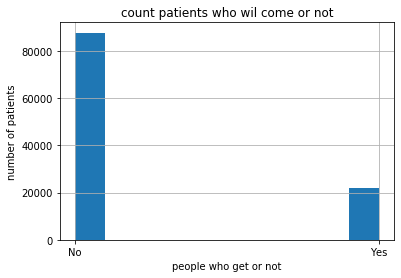

In [110]:
df.Noshow.hist();
plt.ylabel('number of patients')
plt.xlabel('people who get or not')
plt.title('count patients who wil come or not');

In [111]:
df_no = df[df['Noshow'] == 'No']
df_yes = df[df['Noshow'] == 'Yes']

In [112]:
ind = df_no['Scholarship'].value_counts().index
df_no['Scholarship'].value_counts()

0    79549
1     8245
Name: Scholarship, dtype: int64

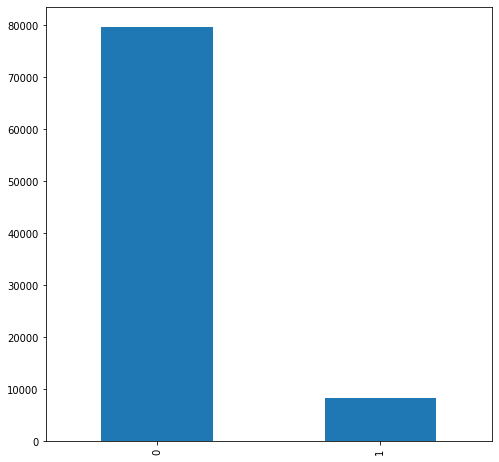

In [113]:
df_no['Scholarship'].value_counts()[ind].plot(kind = 'bar',figsize=(8,8));

In [114]:
df_yes['Scholarship'].value_counts()

0    19542
1     2556
Name: Scholarship, dtype: int64

Text(0.5, 0, 'people who have scholarship or not and not will come')

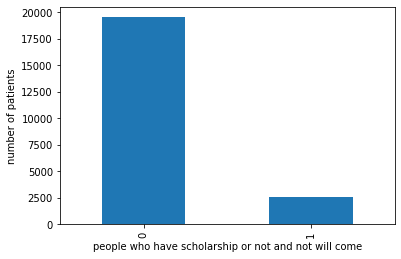

In [115]:
df_yes['Scholarship'].value_counts()[ind].plot(kind = 'bar');
plt.ylabel('number of patients')
plt.xlabel('people who have scholarship or not and not will come')
#plt.title('count patients who have scholarship or not and  not will come');

In [116]:
ind = df_yes['Neighbourhood'].value_counts().index
df_yes['Neighbourhood'].value_counts()

JARDIM CAMBURI                 1429
MARIA ORTIZ                    1219
ITARARÉ                         902
RESISTÊNCIA                     885
CENTRO                          695
                               ... 
PONTAL DE CAMBURI                12
ILHA DO BOI                       3
ILHAS OCEÂNICAS DE TRINDADE       2
ILHA DO FRADE                     2
AEROPORTO                         1
Name: Neighbourhood, Length: 80, dtype: int64

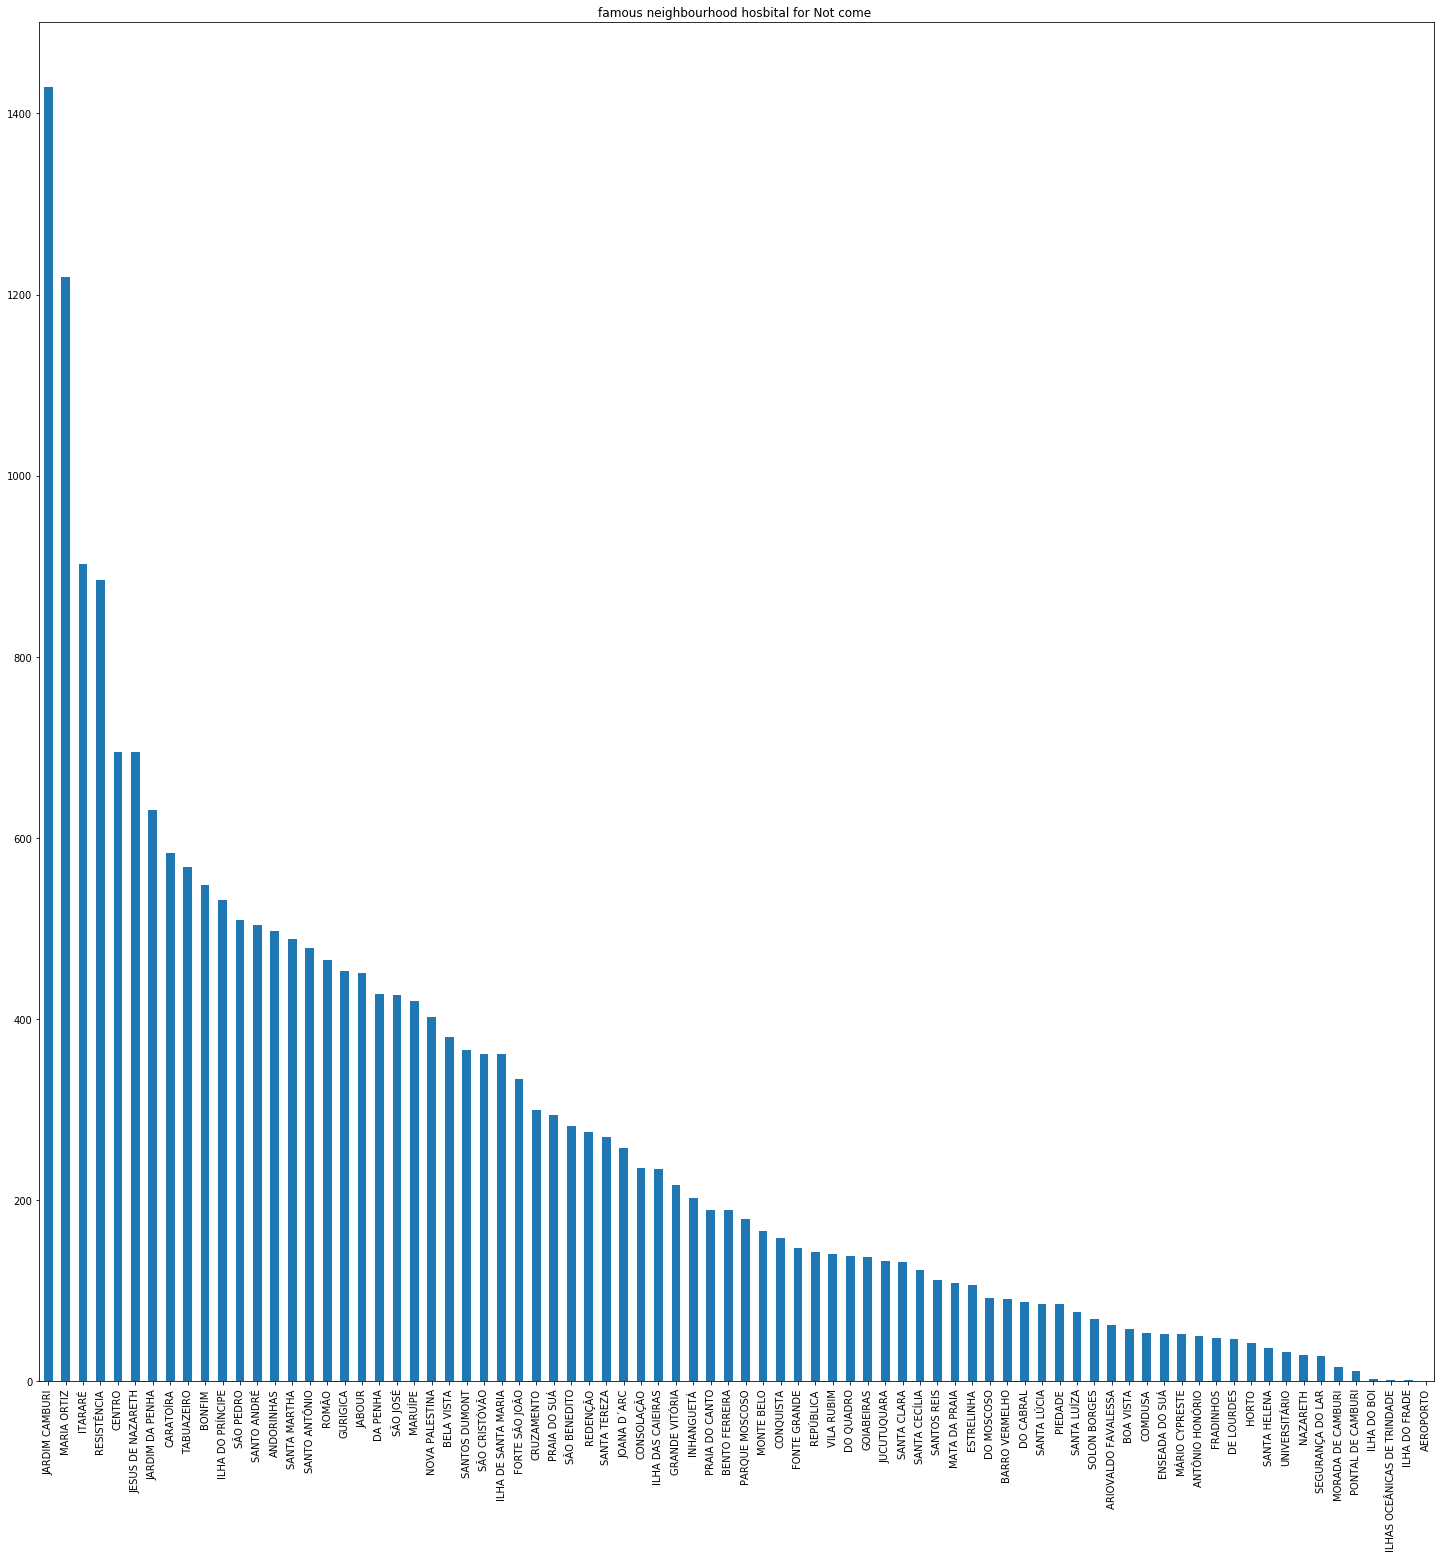

In [117]:
df_yes['Neighbourhood'].value_counts()[ind].plot(kind = 'bar', figsize=(25,25),title='famous neighbourhood hosbital for Not come ');

In [118]:
df_no['Neighbourhood'].value_counts()

JARDIM CAMBURI       6187
MARIA ORTIZ          4585
RESISTÊNCIA          3502
JARDIM DA PENHA      3242
CENTRO               2615
                     ... 
PONTAL DE CAMBURI      57
ILHA DO BOI            32
ILHA DO FRADE           8
AEROPORTO               7
PARQUE INDUSTRIAL       1
Name: Neighbourhood, Length: 80, dtype: int64

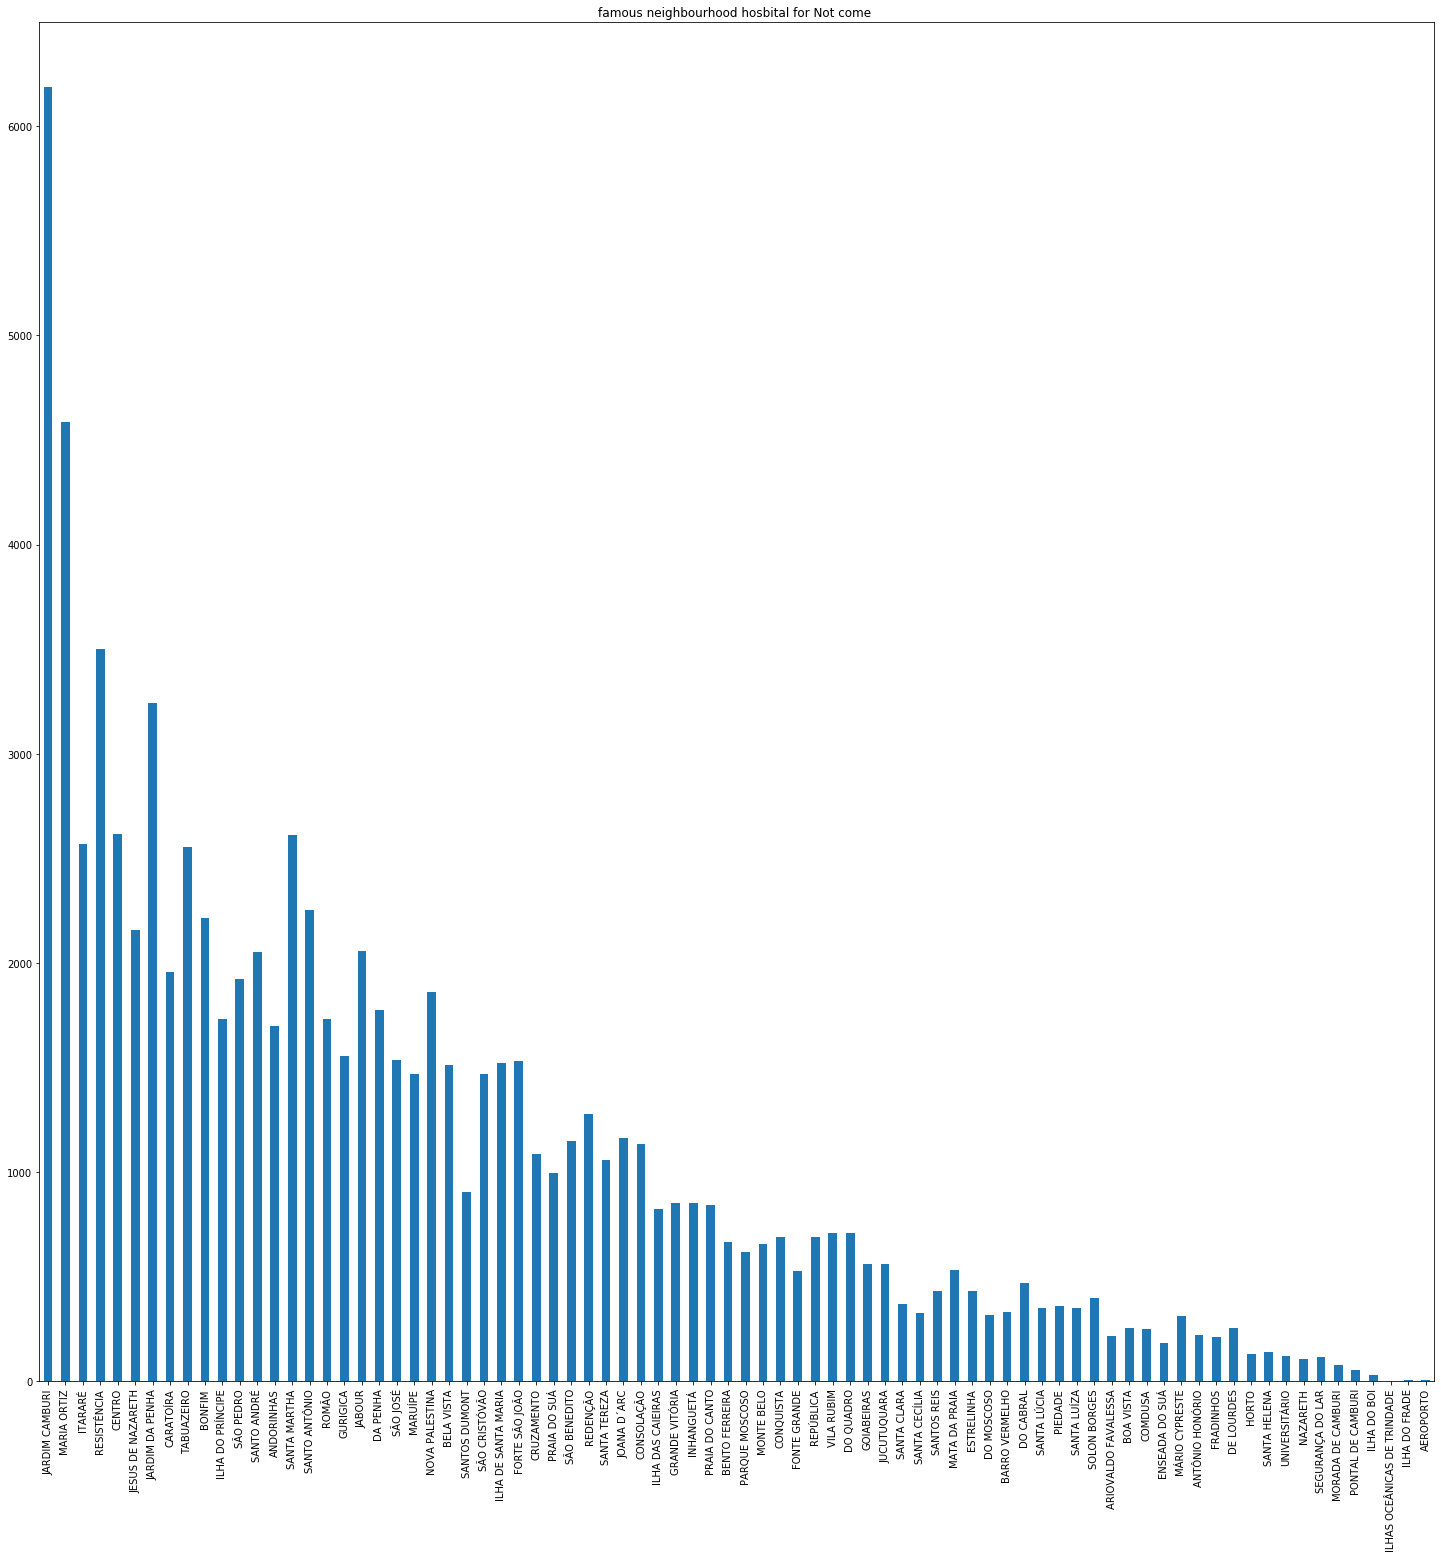

In [119]:
df_no['Neighbourhood'].value_counts()[ind].plot(kind = 'bar', figsize=(25,25),title='famous neighbourhood hosbital for Not come ');

In [120]:
df_yes['ScheduledDay'].value_counts()

2016-04-25 17:17:46+00:00    21
2016-04-25 17:18:27+00:00    20
2016-05-06 07:09:53+00:00    16
2016-04-25 17:17:23+00:00    16
2016-05-31 09:54:52+00:00    14
                             ..
2016-05-19 09:26:21+00:00     1
2016-05-03 13:29:58+00:00     1
2016-05-05 09:28:58+00:00     1
2016-05-24 10:23:32+00:00     1
2016-05-03 09:15:25+00:00     1
Name: ScheduledDay, Length: 21180, dtype: int64

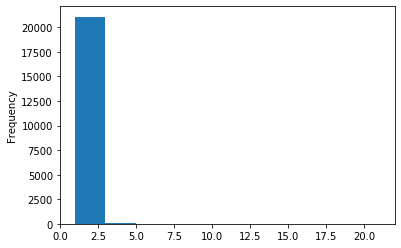

In [121]:
ind = df_yes['ScheduledDay'].value_counts().index
df_yes['ScheduledDay'].value_counts()[ind].plot(kind = 'hist');

In [122]:
df_no['ScheduledDay'].value_counts()

2016-03-29 10:44:23+00:00    11
2016-03-29 10:43:41+00:00    10
2016-05-25 09:36:45+00:00     9
2016-06-03 13:13:04+00:00     9
2016-05-09 15:52:40+00:00     9
                             ..
2016-05-12 09:09:57+00:00     1
2016-06-08 13:27:45+00:00     1
2016-05-13 09:36:41+00:00     1
2016-06-01 11:01:09+00:00     1
2016-05-04 09:41:05+00:00     1
Name: ScheduledDay, Length: 83708, dtype: int64

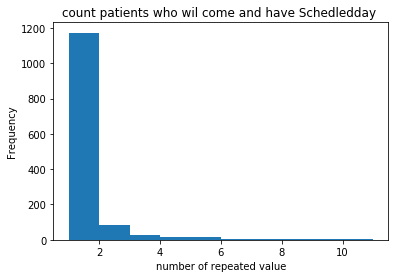

In [123]:
df_no['ScheduledDay'].value_counts()[ind].plot(kind = 'hist');
plt.xlabel('number of repeated value')
plt.title('count patients who wil come and have Schedledday ');

this is a histogram that describe number of repeated value for patients who will come and have Schedledday

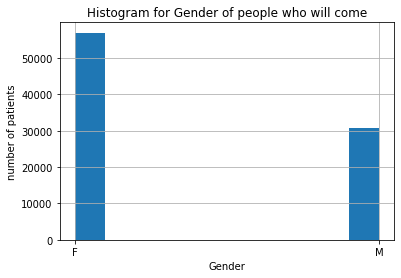

In [124]:
df_no.Gender.hist();
plt.ylabel('number of patients')
plt.xlabel('Gender')
plt.title('Histogram for Gender of people who will come');

this is a histogram that describe number of gender for patients who will come 

In [125]:
df_no.Gender.describe()

count     87794
unique        2
top           F
freq      56962
Name: Gender, dtype: object

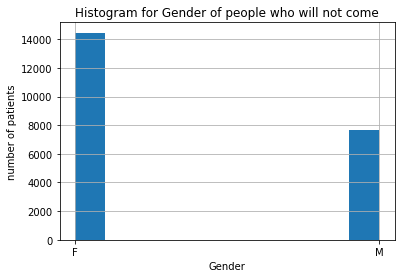

In [126]:
df_yes.Gender.hist();
plt.ylabel('number of patients')
plt.xlabel('Gender')
plt.title('Histogram for Gender of people who will not come');

this is a histogram that describe number of gender for patients who will not come 

In [127]:
df_yes.Gender.describe()

count     22098
unique        2
top           F
freq      14455
Name: Gender, dtype: object

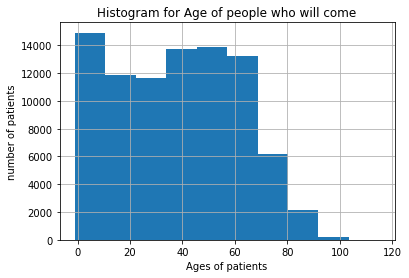

In [128]:
df_no.Age.hist();
plt.ylabel('number of patients')
plt.xlabel('Ages of patients')
plt.title('Histogram for Age of people who will come');

this is a histogram that describe Ages for patients who will come 

In [129]:
df_no.Age.describe()

count    87794.000000
mean        37.795681
std         23.350062
min         -1.000000
25%         18.000000
50%         38.000000
75%         56.000000
max        115.000000
Name: Age, dtype: float64

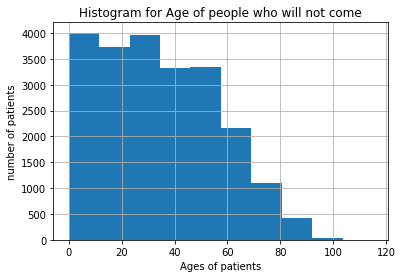

In [130]:
df_yes.Age.hist();
plt.ylabel('number of patients')
plt.xlabel('Ages of patients')
plt.title('Histogram for Age of people who will not come');

this is a histogram that describe Ages for patients who will not come 

In [131]:
df_yes.Age.describe()

count    22098.000000
mean        34.283917
std         21.965982
min          0.000000
25%         16.000000
50%         33.000000
75%         51.000000
max        115.000000
Name: Age, dtype: float64

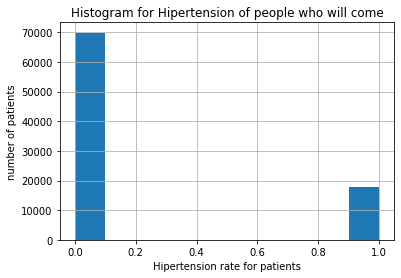

In [132]:
df_no.Hipertension.hist();
plt.ylabel('number of patients')
plt.xlabel('Hipertension rate for patients')
plt.title('Histogram for Hipertension of people who will come');

this is a histogram that describe number of patients who will come and have Hipertensions

In [133]:
df_no.Hipertension.describe()

count    87794.000000
mean         0.204433
std          0.403289
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Hipertension, dtype: float64

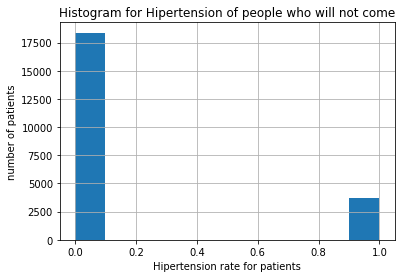

In [134]:
df_yes.Hipertension.hist();
plt.ylabel('number of patients')
plt.xlabel('Hipertension rate for patients')
plt.title('Histogram for Hipertension of people who will not come');

this is a histogram that describe number of patients who will not come and have hipertensions

In [135]:
df_yes.Hipertension.describe()

count    22098.000000
mean         0.168703
std          0.374498
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Hipertension, dtype: float64

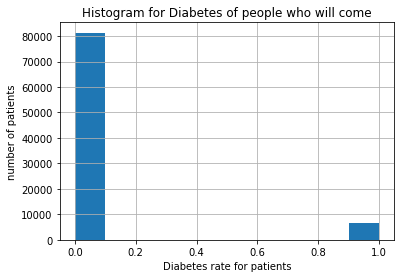

In [136]:
df_no.Diabetes.hist();
plt.ylabel('number of patients')
plt.xlabel('Diabetes rate for patients')
plt.title('Histogram for Diabetes of people who will come');

this is a histogram that describe number of patients who will come and have Diabetes

In [137]:
df_no.Diabetes.describe()

count    87794.000000
mean         0.073707
std          0.261294
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Diabetes, dtype: float64

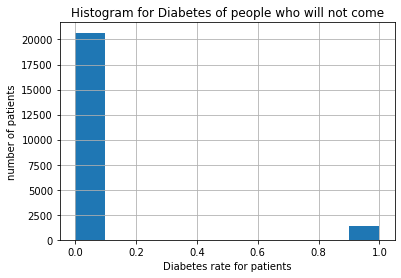

In [138]:
df_yes.Diabetes.hist();
plt.ylabel('number of patients')
plt.xlabel('Diabetes rate for patients')
plt.title('Histogram for Diabetes of people who will not come');

this is a histogram that describe number of patients who will not come and have Diabetes

In [139]:
df_yes.Diabetes.describe()

count    22098.00000
mean         0.06435
std          0.24538
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max          1.00000
Name: Diabetes, dtype: float64

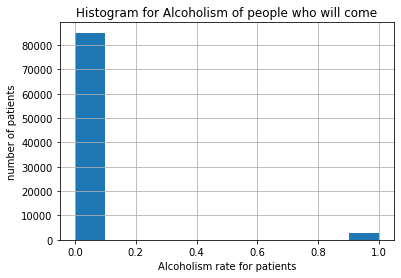

In [140]:
df_no.Alcoholism.hist();
plt.ylabel('number of patients')
plt.xlabel('Alcoholism rate for patients')
plt.title('Histogram for Alcoholism of people who will come');

this is a histogram that describe number of patients who will come and drink Alcohol

In [141]:
df_no.Alcoholism.describe()

count    87794.000000
mean         0.030480
std          0.171906
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Alcoholism, dtype: float64

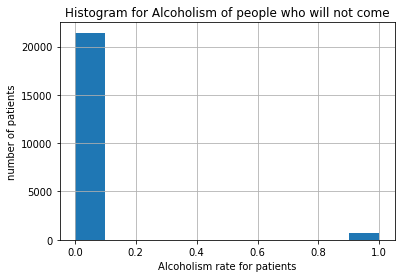

In [142]:
df_yes.Alcoholism.hist();
plt.ylabel('number of patients')
plt.xlabel('Alcoholism rate for patients')
plt.title('Histogram for Alcoholism of people who will not come');

this is a histogram that describe number of patients who will not come and drink Alcohol

In [143]:
df_yes.Alcoholism.describe()

count    22098.000000
mean         0.030229
std          0.171221
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Alcoholism, dtype: float64

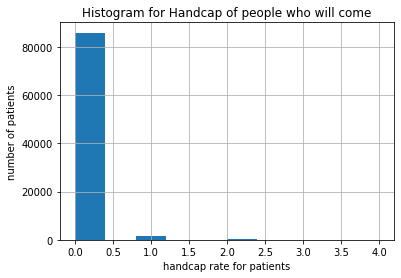

In [144]:
df_no.Handcap.hist();
plt.ylabel('number of patients')
plt.xlabel('handcap rate for patients')
plt.title('Histogram for Handcap of people who will come');

this is a histogram that describe number of patients who will come and have Handcap

In [145]:
df_no.Handcap.describe()

count    87794.000000
mean         0.022633
std          0.162000
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: Handcap, dtype: float64

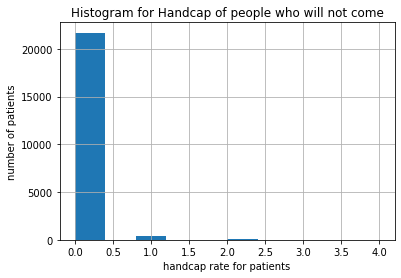

In [146]:
df_yes.Handcap.hist();
plt.ylabel('number of patients')
plt.xlabel('handcap rate for patients')
plt.title('Histogram for Handcap of people who will not come');

this is a histogram that describe number of patients who will not come and have Handcap

In [147]:
df_yes.Handcap.describe()

count    22098.000000
mean         0.020138
std          0.156331
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: Handcap, dtype: float64

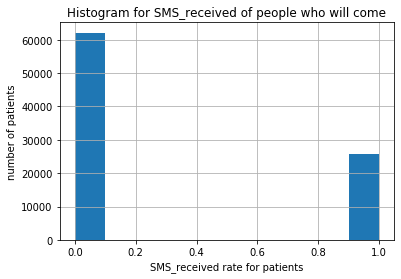

In [148]:
df_no.SMS_received.hist();
plt.ylabel('number of patients')
plt.xlabel('SMS_received rate for patients')
plt.title('Histogram for SMS_received of people who will come');

this is a histogram that describe number of patients who will come and have SMS_recieved

In [149]:
df_no.SMS_received.describe()

count    87794.000000
mean         0.292708
std          0.455008
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: SMS_received, dtype: float64

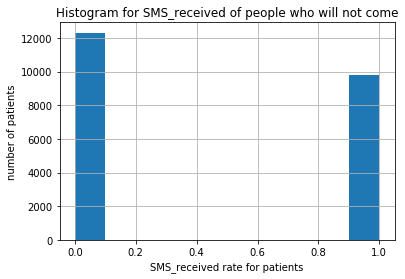

In [150]:
df_yes.SMS_received.hist();
plt.ylabel('number of patients')
plt.xlabel('SMS_received rate for patients')
plt.title('Histogram for SMS_received of people who will not come');

this is a histogram that describe number of patients who will not come and have SMS_recieved

In [151]:
df_yes.SMS_received.describe()

count    22098.000000
mean         0.442755
std          0.496723
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: SMS_received, dtype: float64

In [152]:
df_no.mean()

Age             37.795681
Scholarship      0.093913
Hipertension     0.204433
Diabetes         0.073707
Alcoholism       0.030480
Handcap          0.022633
SMS_received     0.292708
dtype: float64

In [153]:
df_yes.mean()

Age             34.283917
Scholarship      0.115667
Hipertension     0.168703
Diabetes         0.064350
Alcoholism       0.030229
Handcap          0.020138
SMS_received     0.442755
dtype: float64

<a id='conclusions'></a>
## Conclusions

> **results**: Our data suggest that
1. There is not big difference between the distribution of Age between patients who showed up for the appointment versus the patients that did not show up for the appointment.
2. There is a higher percentage of people that received an SMS and did not show up when compared to people who received an SMS and did show up.
3. People that have a disease are 3% more likely to show up for the appointment than people who do not have a disease
4. Handicap patients specifically.however, are more likely to show up to the appointment compared to people who are not Handicap.
5. Being enrolled in the Scholarship progranm does not seem to make peopie more likely to show up to the appointment.

> **Limitations**: There are a couple of limitations with our data
1. Most of our variables are categorical, which does not allow for a high level of statistical method that can be used to provide correlations etc
2. The statistics used here are descriptive statistics not inferential, meaning that we did not create any hypotheses or controlled experiments or 
3. We do not have a lot of details for certain factors to draw conclusions. For the SMS received example, the data shows that no-showers are more likely to receive an SMS, This may seem counter intuitive, but we do not have information on the conditions of when the SMS is sent. For example they may target No-showers with SMS, or they may send the SMS once the Patient has not checked in 30 minutes prior to their appointment etc.
4. cannot show strong correlations between factors since most of our data is categoriçal.


## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [154]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'No_show.ipynb'])

0